In [2]:
# Imports
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter

from capture_utils import savefig_no_whitespace

scenes = [
    # "8_29_lab_scene",
    "8_29_kitchen_scene",
    "8_29_conference_room_scene",
    "8_30_conference_room2_scene",
    "8_30_Hallway",
    "8_30_poster_scene",
    "8_30_small_lab_scene",
]
models = [
    "midas"
]
rootdir = "figures"

In [3]:
# Parula colormap
from matplotlib.colors import LinearSegmentedColormap
from numpy import nan, inf

# Used to reconstruct the colormap in viscm
parameters = {'xp': [8.6840042204210732, -21.378780072752193, -13.715204596193757, -94.858944936224646, 53.679179741776352, -9.6],
              'yp': [-36.497267048261136, -44.616177228232843, 10.381246780010315, 84.763008758371967, 6.324059763008762, 41],
              'min_JK': 25.4069767442,
              'max_JK': 95}

cm_data = [[ 0.26710521,  0.03311059,  0.6188155 ],
       [ 0.26493929,  0.04780926,  0.62261795],
       [ 0.26260545,  0.06084214,  0.62619176],
       [ 0.26009691,  0.07264411,  0.62951561],
       [ 0.25740785,  0.08360391,  0.63256745],
       [ 0.25453369,  0.09395358,  0.63532497],
       [ 0.25147146,  0.10384228,  0.6377661 ],
       [ 0.24822014,  0.11337029,  0.6398697 ],
       [ 0.24478105,  0.12260661,  0.64161629],
       [ 0.24115816,  0.131599  ,  0.6429888 ],
       [ 0.23735836,  0.14038009,  0.64397346],
       [ 0.23339166,  0.14897137,  0.64456048],
       [ 0.22927127,  0.15738602,  0.64474476],
       [ 0.22501278,  0.16563165,  0.64452595],
       [ 0.22063349,  0.17371215,  0.64390834],
       [ 0.21616055,  0.18162302,  0.64290515],
       [ 0.21161851,  0.18936156,  0.64153295],
       [ 0.20703353,  0.19692415,  0.63981287],
       [ 0.20243273,  0.20430706,  0.63776986],
       [ 0.19784363,  0.211507  ,  0.63543183],
       [ 0.19329361,  0.21852157,  0.63282872],
       [ 0.18880937,  0.2253495 ,  0.62999156],
       [ 0.18442119,  0.23198815,  0.62695569],
       [ 0.18014936,  0.23844124,  0.62374886],
       [ 0.17601569,  0.24471172,  0.62040016],
       [ 0.17204028,  0.25080356,  0.61693715],
       [ 0.16824123,  0.25672163,  0.6133854 ],
       [ 0.16463462,  0.26247158,  0.60976836],
       [ 0.16123449,  0.26805963,  0.60610723],
       [ 0.15805279,  0.27349243,  0.60242099],
       [ 0.15509948,  0.27877688,  0.59872645],
       [ 0.15238249,  0.28392004,  0.59503836],
       [ 0.14990781,  0.28892902,  0.59136956],
       [ 0.14767951,  0.29381086,  0.58773113],
       [ 0.14569979,  0.29857245,  0.58413255],
       [ 0.1439691 ,  0.30322055,  0.58058191],
       [ 0.14248613,  0.30776167,  0.57708599],
       [ 0.14124797,  0.31220208,  0.57365049],
       [ 0.14025018,  0.31654779,  0.57028011],
       [ 0.13948691,  0.32080454,  0.5669787 ],
       [ 0.13895174,  0.32497744,  0.56375063],
       [ 0.13863958,  0.32907012,  0.56060453],
       [ 0.138537  ,  0.3330895 ,  0.55753513],
       [ 0.13863384,  0.33704026,  0.55454374],
       [ 0.13891931,  0.34092684,  0.55163126],
       [ 0.13938212,  0.34475344,  0.54879827],
       [ 0.14001061,  0.34852402,  0.54604503],
       [ 0.14079292,  0.35224233,  0.54337156],
       [ 0.14172091,  0.35590982,  0.54078769],
       [ 0.14277848,  0.35953205,  0.53828312],
       [ 0.14395358,  0.36311234,  0.53585661],
       [ 0.1452346 ,  0.36665374,  0.5335074 ],
       [ 0.14661019,  0.3701591 ,  0.5312346 ],
       [ 0.14807104,  0.37363011,  0.52904278],
       [ 0.1496059 ,  0.3770697 ,  0.52692951],
       [ 0.15120289,  0.3804813 ,  0.52488853],
       [ 0.15285214,  0.38386729,  0.52291854],
       [ 0.15454421,  0.38722991,  0.52101815],
       [ 0.15627225,  0.39056998,  0.5191937 ],
       [ 0.15802555,  0.39389087,  0.5174364 ],
       [ 0.15979549,  0.39719482,  0.51574311],
       [ 0.16157425,  0.40048375,  0.51411214],
       [ 0.16335571,  0.40375871,  0.51254622],
       [ 0.16513234,  0.40702178,  0.51104174],
       [ 0.1668964 ,  0.41027528,  0.50959299],
       [ 0.16864151,  0.41352084,  0.50819797],
       [ 0.17036277,  0.41675941,  0.50685814],
       [ 0.1720542 ,  0.41999269,  0.50557008],
       [ 0.17370932,  0.42322271,  0.50432818],
       [ 0.17532301,  0.42645082,  0.50313007],
       [ 0.17689176,  0.42967776,  0.50197686],
       [ 0.17841013,  0.43290523,  0.5008633 ],
       [ 0.17987314,  0.43613477,  0.49978492],
       [ 0.18127676,  0.43936752,  0.49873901],
       [ 0.18261885,  0.44260392,  0.49772638],
       [ 0.18389409,  0.44584578,  0.49673978],
       [ 0.18509911,  0.44909409,  0.49577605],
       [ 0.18623135,  0.4523496 ,  0.494833  ],
       [ 0.18728844,  0.45561305,  0.49390803],
       [ 0.18826671,  0.45888565,  0.49299567],
       [ 0.18916393,  0.46216809,  0.49209268],
       [ 0.18997879,  0.46546084,  0.49119678],
       [ 0.19070881,  0.46876472,  0.49030328],
       [ 0.19135221,  0.47208035,  0.48940827],
       [ 0.19190791,  0.47540815,  0.48850845],
       [ 0.19237491,  0.47874852,  0.4876002 ],
       [ 0.19275204,  0.48210192,  0.48667935],
       [ 0.19303899,  0.48546858,  0.48574251],
       [ 0.19323526,  0.48884877,  0.48478573],
       [ 0.19334062,  0.49224271,  0.48380506],
       [ 0.19335574,  0.49565037,  0.4827974 ],
       [ 0.19328143,  0.49907173,  0.48175948],
       [ 0.19311664,  0.50250719,  0.48068559],
       [ 0.192864  ,  0.50595628,  0.47957408],
       [ 0.19252521,  0.50941877,  0.47842186],
       [ 0.19210087,  0.51289469,  0.47722441],
       [ 0.19159194,  0.516384  ,  0.47597744],
       [ 0.19100267,  0.51988593,  0.47467988],
       [ 0.19033595,  0.52340005,  0.47332894],
       [ 0.18959113,  0.5269267 ,  0.47191795],
       [ 0.18877336,  0.530465  ,  0.47044603],
       [ 0.18788765,  0.53401416,  0.46891178],
       [ 0.18693822,  0.53757359,  0.46731272],
       [ 0.18592276,  0.54114404,  0.46563962],
       [ 0.18485204,  0.54472367,  0.46389595],
       [ 0.18373148,  0.5483118 ,  0.46207951],
       [ 0.18256585,  0.55190791,  0.4601871 ],
       [ 0.18135481,  0.55551253,  0.45821002],
       [ 0.18011172,  0.55912361,  0.45615277],
       [ 0.17884392,  0.56274038,  0.45401341],
       [ 0.17755858,  0.56636217,  0.45178933],
       [ 0.17625543,  0.56998972,  0.44946971],
       [ 0.174952  ,  0.57362064,  0.44706119],
       [ 0.17365805,  0.57725408,  0.44456198],
       [ 0.17238403,  0.58088916,  0.4419703 ],
       [ 0.17113321,  0.58452637,  0.43927576],
       [ 0.1699221 ,  0.58816399,  0.43648119],
       [ 0.1687662 ,  0.5918006 ,  0.43358772],
       [ 0.16767908,  0.59543526,  0.43059358],
       [ 0.16667511,  0.59906699,  0.42749697],
       [ 0.16575939,  0.60269653,  0.42428344],
       [ 0.16495764,  0.6063212 ,  0.42096245],
       [ 0.16428695,  0.60993988,  0.41753246],
       [ 0.16376481,  0.61355147,  0.41399151],
       [ 0.16340924,  0.61715487,  0.41033757],
       [ 0.16323549,  0.62074951,  0.40656329],
       [ 0.16326148,  0.62433443,  0.40266378],
       [ 0.16351136,  0.62790748,  0.39864431],
       [ 0.16400433,  0.63146734,  0.39450263],
       [ 0.16475937,  0.63501264,  0.39023638],
       [ 0.16579502,  0.63854196,  0.38584309],
       [ 0.16712921,  0.64205381,  0.38132023],
       [ 0.168779  ,  0.64554661,  0.37666513],
       [ 0.17075915,  0.64901912,  0.37186962],
       [ 0.17308572,  0.65246934,  0.36693299],
       [ 0.1757732 ,  0.65589512,  0.36185643],
       [ 0.17883344,  0.65929449,  0.3566372 ],
       [ 0.18227669,  0.66266536,  0.35127251],
       [ 0.18611159,  0.66600553,  0.34575959],
       [ 0.19034516,  0.66931265,  0.34009571],
       [ 0.19498285,  0.67258423,  0.3342782 ],
       [ 0.20002863,  0.67581761,  0.32830456],
       [ 0.20548509,  0.67900997,  0.3221725 ],
       [ 0.21135348,  0.68215834,  0.31587999],
       [ 0.2176339 ,  0.68525954,  0.30942543],
       [ 0.22432532,  0.68831023,  0.30280771],
       [ 0.23142568,  0.69130688,  0.29602636],
       [ 0.23893914,  0.69424565,  0.28906643],
       [ 0.2468574 ,  0.69712255,  0.28194103],
       [ 0.25517514,  0.69993351,  0.27465372],
       [ 0.26388625,  0.70267437,  0.26720869],
       [ 0.27298333,  0.70534087,  0.25961196],
       [ 0.28246016,  0.70792854,  0.25186761],
       [ 0.29232159,  0.71043184,  0.2439642 ],
       [ 0.30253943,  0.71284765,  0.23594089],
       [ 0.31309875,  0.71517209,  0.22781515],
       [ 0.32399522,  0.71740028,  0.21959115],
       [ 0.33520729,  0.71952906,  0.21129816],
       [ 0.3467003 ,  0.72155723,  0.20298257],
       [ 0.35846225,  0.72348143,  0.19466318],
       [ 0.3704552 ,  0.72530195,  0.18639333],
       [ 0.38264126,  0.72702007,  0.17822762],
       [ 0.39499483,  0.72863609,  0.17020921],
       [ 0.40746591,  0.73015499,  0.1624122 ],
       [ 0.42001969,  0.73158058,  0.15489659],
       [ 0.43261504,  0.73291878,  0.14773267],
       [ 0.44521378,  0.73417623,  0.14099043],
       [ 0.45777768,  0.73536072,  0.13474173],
       [ 0.47028295,  0.73647823,  0.1290455 ],
       [ 0.48268544,  0.73753985,  0.12397794],
       [ 0.49497773,  0.73854983,  0.11957878],
       [ 0.5071369 ,  0.73951621,  0.11589589],
       [ 0.51913764,  0.74044827,  0.11296861],
       [ 0.53098624,  0.74134823,  0.11080237],
       [ 0.5426701 ,  0.74222288,  0.10940411],
       [ 0.55417235,  0.74308049,  0.10876749],
       [ 0.56550904,  0.74392086,  0.10885609],
       [ 0.57667994,  0.74474781,  0.10963233],
       [ 0.58767906,  0.74556676,  0.11105089],
       [ 0.59850723,  0.74638125,  0.1130567 ],
       [ 0.609179  ,  0.74719067,  0.11558918],
       [ 0.61969877,  0.74799703,  0.11859042],
       [ 0.63007148,  0.74880206,  0.12200388],
       [ 0.64030249,  0.74960714,  0.12577596],
       [ 0.65038997,  0.75041586,  0.12985641],
       [ 0.66034774,  0.75122659,  0.1342004 ],
       [ 0.67018264,  0.75203968,  0.13876817],
       [ 0.67990043,  0.75285567,  0.14352456],
       [ 0.68950682,  0.75367492,  0.14843886],
       [ 0.69900745,  0.75449768,  0.15348445],
       [ 0.70840781,  0.75532408,  0.15863839],
       [ 0.71771325,  0.75615416,  0.16388098],
       [ 0.72692898,  0.75698787,  0.1691954 ],
       [ 0.73606001,  0.75782508,  0.17456729],
       [ 0.74511119,  0.75866562,  0.17998443],
       [ 0.75408719,  0.75950924,  0.18543644],
       [ 0.76299247,  0.76035568,  0.19091446],
       [ 0.77183123,  0.76120466,  0.19641095],
       [ 0.78060815,  0.76205561,  0.20191973],
       [ 0.78932717,  0.76290815,  0.20743538],
       [ 0.79799213,  0.76376186,  0.21295324],
       [ 0.8066067 ,  0.76461631,  0.21846931],
       [ 0.81517444,  0.76547101,  0.22398014],
       [ 0.82369877,  0.76632547,  0.2294827 ],
       [ 0.832183  ,  0.7671792 ,  0.2349743 ],
       [ 0.8406303 ,  0.76803167,  0.24045248],
       [ 0.84904371,  0.76888236,  0.24591492],
       [ 0.85742615,  0.76973076,  0.25135935],
       [ 0.86578037,  0.77057636,  0.25678342],
       [ 0.87410891,  0.77141875,  0.2621846 ],
       [ 0.88241406,  0.77225757,  0.26755999],
       [ 0.89070781,  0.77308772,  0.27291122],
       [ 0.89898836,  0.77391069,  0.27823228],
       [ 0.90725475,  0.77472764,  0.28351668],
       [ 0.91550775,  0.77553893,  0.28875751],
       [ 0.92375722,  0.7763404 ,  0.29395046],
       [ 0.9320227 ,  0.77712286,  0.29909267],
       [ 0.94027715,  0.7779011 ,  0.30415428],
       [ 0.94856742,  0.77865213,  0.3091325 ],
       [ 0.95686038,  0.7793949 ,  0.31397459],
       [ 0.965222  ,  0.7800975 ,  0.31864342],
       [ 0.97365189,  0.78076521,  0.32301107],
       [ 0.98227405,  0.78134549,  0.32678728],
       [ 0.99136564,  0.78176999,  0.3281624 ],
       [ 0.99505988,  0.78542889,  0.32106514],
       [ 0.99594185,  0.79046888,  0.31648808],
       [ 0.99646635,  0.79566972,  0.31244662],
       [ 0.99681528,  0.80094905,  0.30858532],
       [ 0.9970578 ,  0.80627441,  0.30479247],
       [ 0.99724883,  0.81161757,  0.30105328],
       [ 0.99736711,  0.81699344,  0.29725528],
       [ 0.99742254,  0.82239736,  0.29337235],
       [ 0.99744736,  0.82781159,  0.28943391],
       [ 0.99744951,  0.83323244,  0.28543062],
       [ 0.9973953 ,  0.83867931,  0.2812767 ],
       [ 0.99727248,  0.84415897,  0.27692897],
       [ 0.99713953,  0.84963903,  0.27248698],
       [ 0.99698641,  0.85512544,  0.26791703],
       [ 0.99673736,  0.86065927,  0.26304767],
       [ 0.99652358,  0.86616957,  0.25813608],
       [ 0.99622774,  0.87171946,  0.25292044],
       [ 0.99590494,  0.87727931,  0.24750009],
       [ 0.99555225,  0.88285068,  0.2418514 ],
       [ 0.99513763,  0.8884501 ,  0.23588062],
       [ 0.99471252,  0.89405076,  0.2296837 ],
       [ 0.99421873,  0.89968246,  0.2230963 ],
       [ 0.99370185,  0.90532165,  0.21619768],
       [ 0.99313786,  0.91098038,  0.2088926 ],
       [ 0.99250707,  0.91666811,  0.20108214],
       [ 0.99187888,  0.92235023,  0.19290417],
       [ 0.99110991,  0.92809686,  0.18387963],
       [ 0.99042108,  0.93379995,  0.17458127],
       [ 0.98958484,  0.93956962,  0.16420166],
       [ 0.98873988,  0.94533859,  0.15303117],
       [ 0.98784836,  0.95112482,  0.14074826],
       [ 0.98680727,  0.95697596,  0.12661626]]

parula = LinearSegmentedColormap.from_list('parula', cm_data)



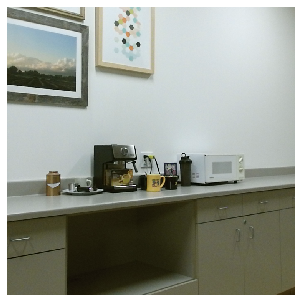

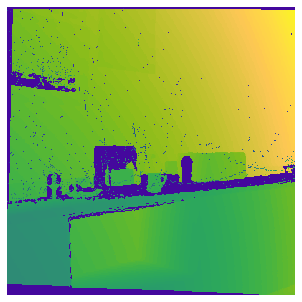

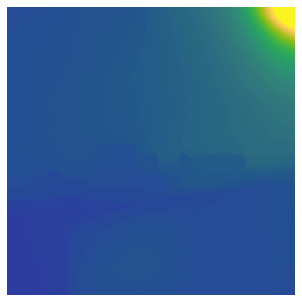

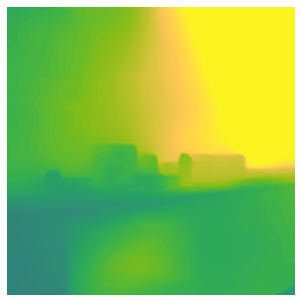

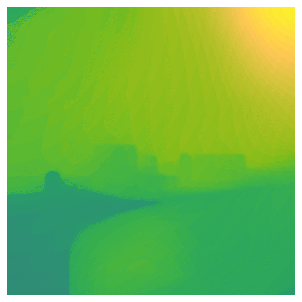

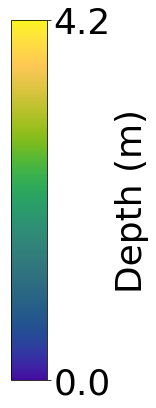

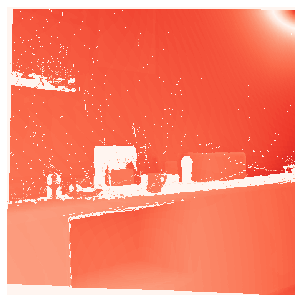

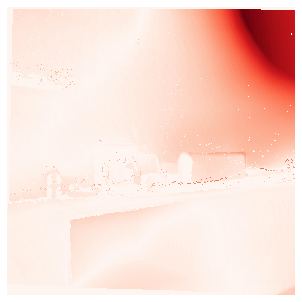

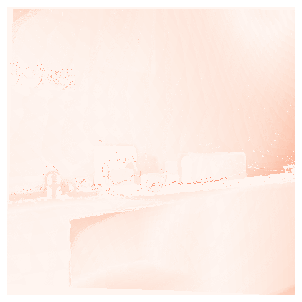

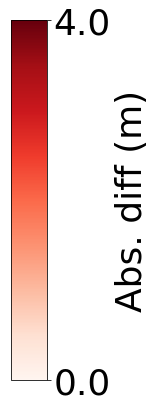

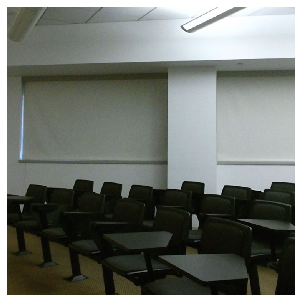

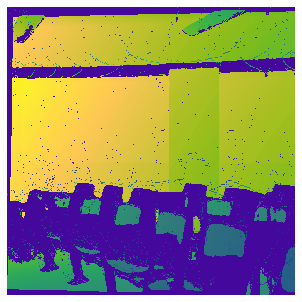

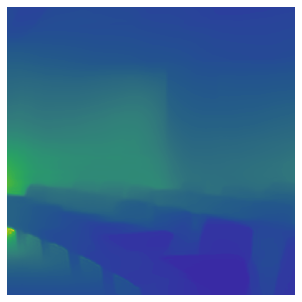

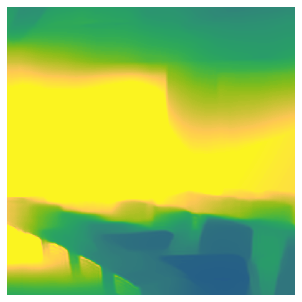

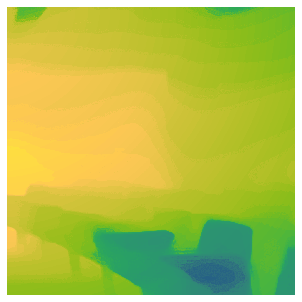

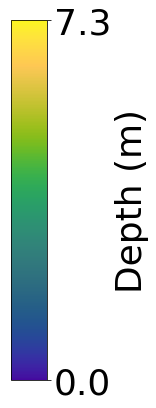

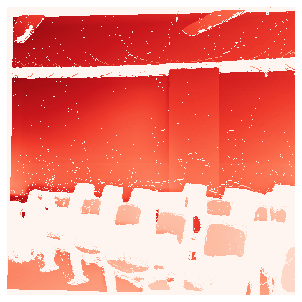

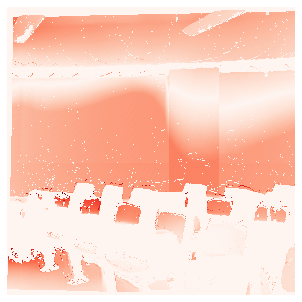

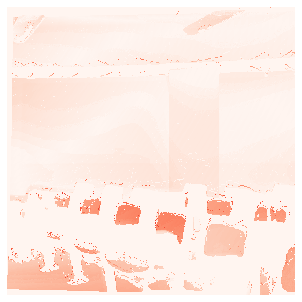

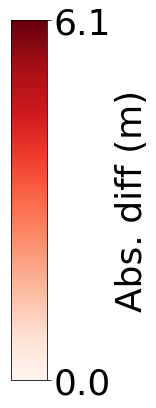

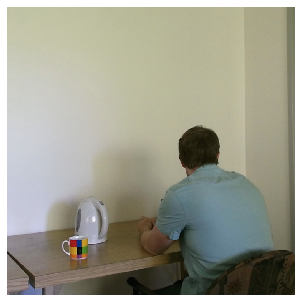

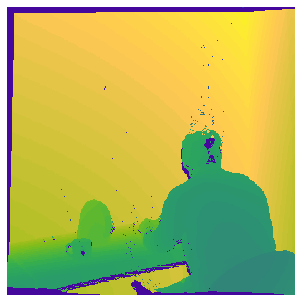

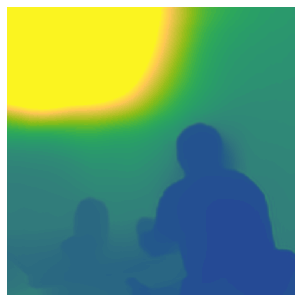

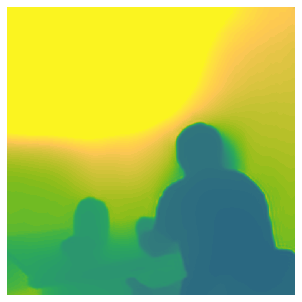

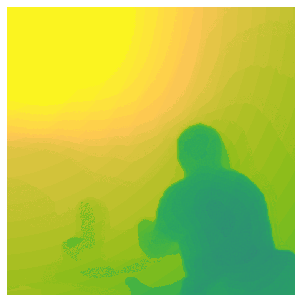

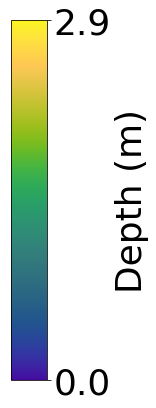

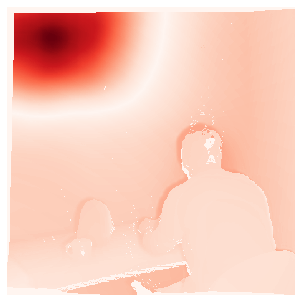

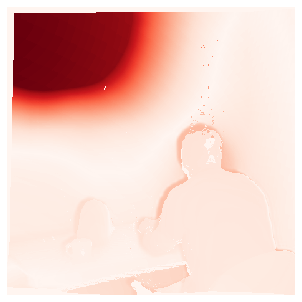

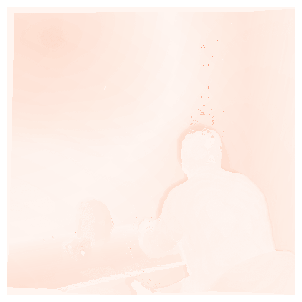

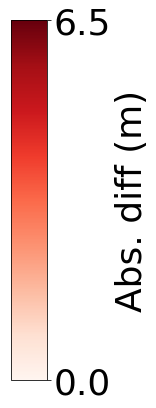

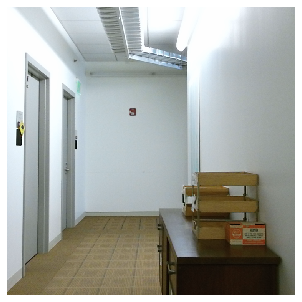

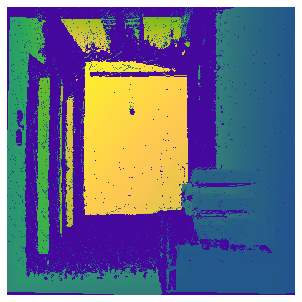

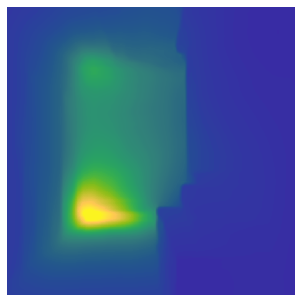

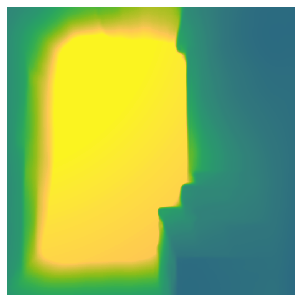

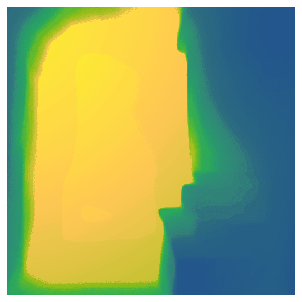

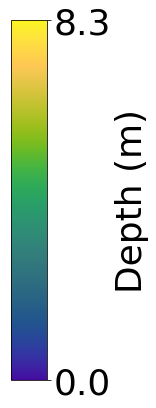

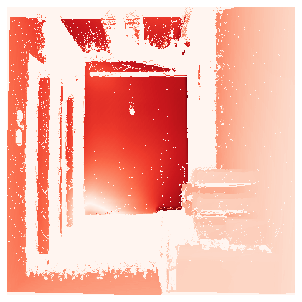

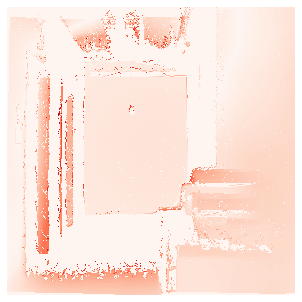

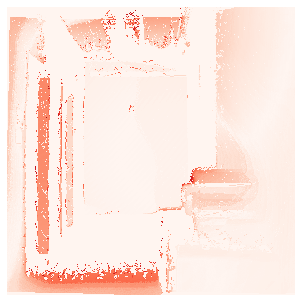

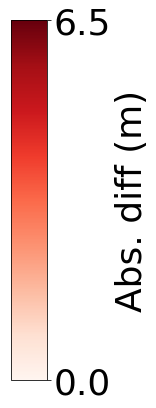

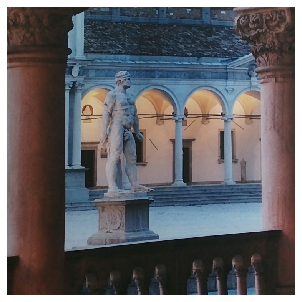

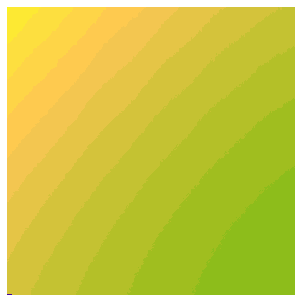

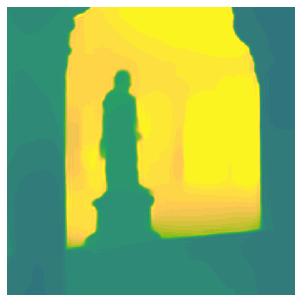

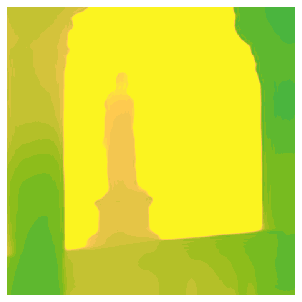

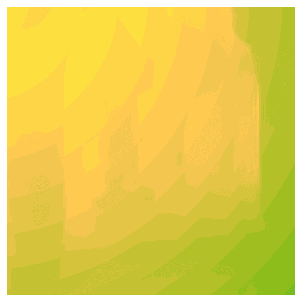

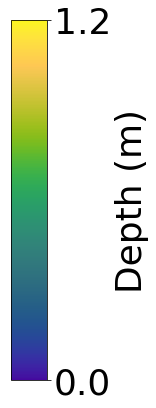

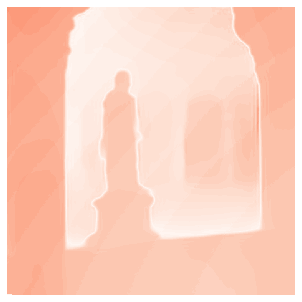

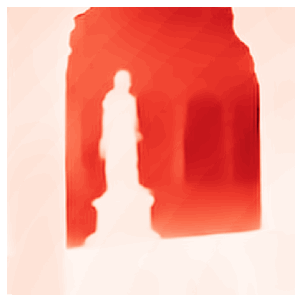

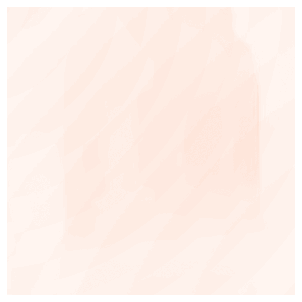

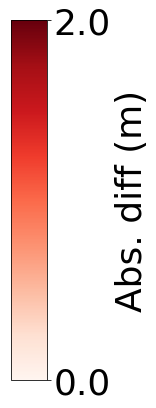

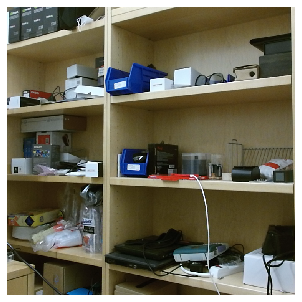

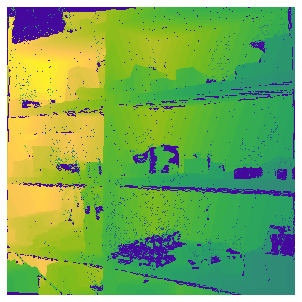

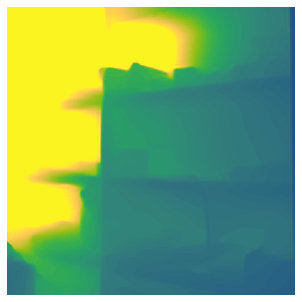

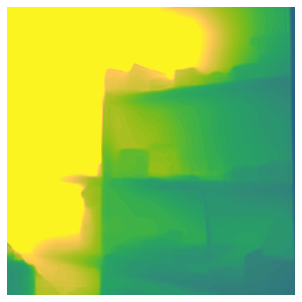

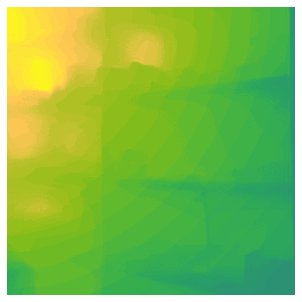

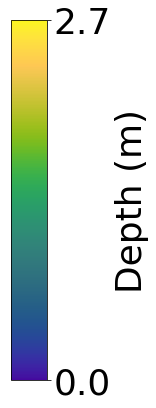

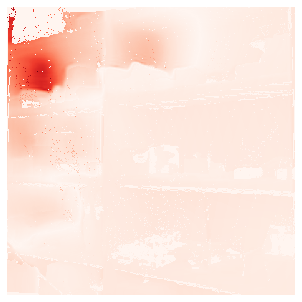

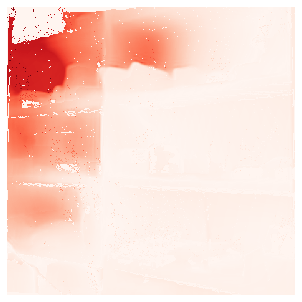

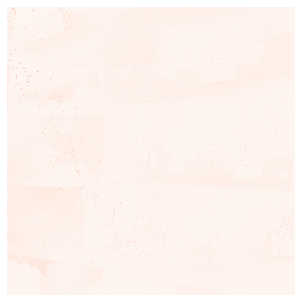

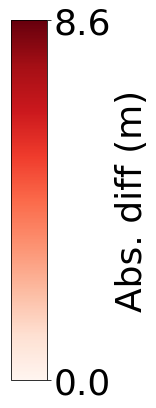

In [19]:
# Diff Maps
def get_diff_maps_and_rmses(gt, preds, mask):
    """
    Compares gt map to all preds and outputs a diff map for each one,
    as well as a range of diffs for the colorbar (min is always 0)
    """
    diffs = []
    rmses = []
    for pred in preds:
        diffs.append(np.abs(gt - pred)*mask)
        rmses.append(np.sqrt(np.mean((gt - pred)**2*mask)))
    max_diff = max(np.max(diff) for diff in diffs)
    return diffs, rmses, max_diff

def format_rmses(rmses):
    out = " & ".join("RMSE = {:0.3f}".format(rmse) for rmse in rmses)
    return out 

def crop_and_scale_figure(img, crop, newmin, newmax):
    """
    Assumes img is in [0,1]
    """
    img = img * (newmax - newmin) + newmin
    return img[crop[0]:crop[1], crop[2]:crop[3], ...]

def save_normalized_imgs_and_colorbar(imgs, names, cmap, norm, scenedir, imgtype, cbar_label):
    for name, img in zip(names, imgs):
        plt.figure()
        plt.imshow(img, cmap=cmap, norm=norm)
        savefig_no_whitespace(os.path.join(scenedir, "{}_{}_fig.png".format(name, imgtype)))
    # Save colorbar
    cb_fig, cb_ax = plt.subplots(1, 1, figsize=(0.5, 5))
    cb = mpl.colorbar.ColorbarBase(cb_ax,
                                   cmap=cmap, norm=norm, orientation='vertical')
    cb.set_ticks([norm.vmin, norm.vmax])
    cb_ax.tick_params(axis='y', labelsize=36)
    cb_ax.set_yticklabels(["{:0.1f}".format(norm.vmin),
                           "{:0.1f}".format(norm.vmax)])
    cb_ax.set_ylabel(cbar_label, fontsize=36)
#     cb_ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0,
                        hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.savefig(os.path.join(scenedir, "{}_colorbar.pdf".format(imgtype)),
                bbox_inches='tight',
                pad_inches=0.1)

# square crop everything with side length s
s = 750


for model in models:
    for scene in scenes:
        scenedir = os.path.join(rootdir, model, scene)
        
        # Load depth range
        a = np.load(os.path.join(scenedir, "mins_and_maxes.npy"), allow_pickle=True).item()
        min_z = a['min_z']
        max_z = a['max_z']
        
        gt_z_proj_crop = plt.imread(os.path.join(scenedir, "gt_z_proj_crop.png"))
        top = gt_z_proj_crop.shape[0]//2 - s//2
        bot = gt_z_proj_crop.shape[0]//2 + s//2
        left = gt_z_proj_crop.shape[1]//2 - s//2
        right = gt_z_proj_crop.shape[1]//2 + s//2
        figure_crop = (top, bot, left, right)
        gt_z_proj_crop = crop_and_scale_figure(gt_z_proj_crop, figure_crop, min_z, max_z)
        z_init = crop_and_scale_figure(plt.imread(os.path.join(scenedir, "z_init.png")), figure_crop, min_z, max_z)
        z_pred = crop_and_scale_figure(plt.imread(os.path.join(scenedir, "z_pred.png")), figure_crop, min_z, max_z)
        z_med_scaled = crop_and_scale_figure(plt.imread(os.path.join(scenedir, "z_med_scaled.png")), figure_crop, min_z, max_z)
        mask = crop_and_scale_figure(plt.imread(os.path.join(scenedir, "mask_proj_crop.png")), figure_crop, 0., 1.)
        preds = [z_init, z_med_scaled, z_pred]
        names = ["z_init", "z_med_scaled", "z_pred"]
        diffs, rmses, max_diff = get_diff_maps_and_rmses(gt_z_proj_crop, preds, mask)

        # Also square crop the rgb image
        rgb_crop = crop_and_scale_figure(plt.imread(os.path.join(scenedir, "rgb_cropped.png")), figure_crop, 0., 1.)
        plt.figure()
        plt.imshow(rgb_crop)
        savefig_no_whitespace(os.path.join(scenedir, "rgb_cropped_fig.png"))
        
        # Save depth images
        depth_cmap = parula
        depth_norm = mpl.colors.Normalize(vmin=np.min(gt_z_proj_crop), vmax=np.max(gt_z_proj_crop))
        save_normalized_imgs_and_colorbar([gt_z_proj_crop] + preds, ["gt_z_proj_crop"] + names, depth_cmap, depth_norm,
                                          scenedir, "depth", "Depth (m)")

        # Save diff maps
        diff_cmap = mpl.cm.Reds
        diff_norm = mpl.colors.Normalize(vmin=0., vmax=max_diff)
        save_normalized_imgs_and_colorbar(diffs, names, diff_cmap, diff_norm,
                                          scenedir, "diff", "Abs. diff (m)")
        
        # Save RMSEs
        with open(os.path.join(scenedir, "rmses.tex"), "w") as f:
            f.write(format_rmses(rmses))
        
#         plt.close('all')

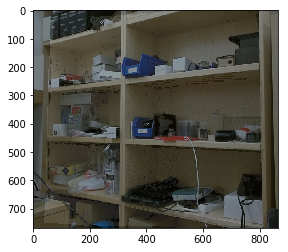

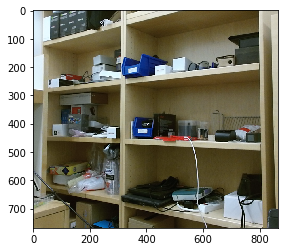

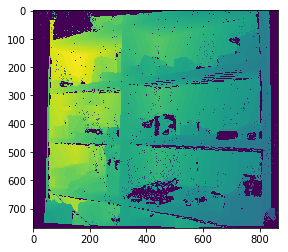

In [20]:
import skimage

def blend(a, b, alpha=0.5):
    """
    Alpha blend two images.
    Parameters
    ----------
    a, b : numpy.ndarray
        Images to blend.
    alpha : float
        Blending factor.
    Returns
    -------
    result : numpy.ndarray
        Blended image.
    """

    a = skimage.img_as_float(a)
    b = skimage.img_as_float(b)
    return a*alpha+(1-alpha)*b
scenedir = os.path.join(rootdir, model, "8_30_small_lab_scene")
rgb_cropped = plt.imread(os.path.join(scenedir, "rgb_cropped.png"))
gt_z_proj_crop = plt.imread(os.path.join(scenedir, "gt_z_proj_crop.png"))
# plt.imshow(rgb_cropped)
plt.imshow(blend(rgb_cropped,
                 gt_z_proj_crop[..., np.newaxis]))
plt.figure()
plt.imshow(rgb_cropped)
plt.figure()
plt.imshow(gt_z_proj_crop)

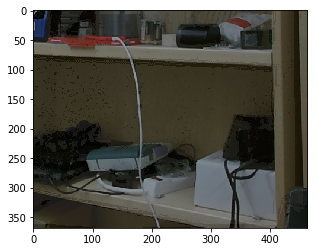

In [22]:
offset = [-1, -1]
# plt.imshow(rgb_cropped[550:, 650:,:])
# plt.figure()
# plt.imshow(gt_z_proj_crop[550+offset[0]:offset[0], 650+offset[1]:offset[1]])
topleft = [400, 400]
plt.imshow(blend(rgb_cropped[topleft[0]:, topleft[1]:,:],
                 gt_z_proj_crop[topleft[0]+offset[0]:offset[0], topleft[1]+offset[1]:offset[1], np.newaxis]))

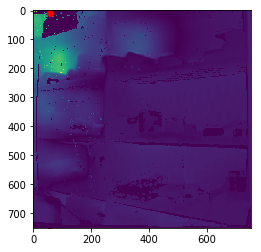

In [58]:
plt.imshow(diffs[0])
test = diffs[0]
diffs[0].shape
s = 750

top = test.shape[0]//2 - s//2
bot = test.shape[0]//2 + s//2
left = test.shape[1]//2 - s//2
right = test.shape[1]//2 + s//2
# plt.plot(left, top, 'ro')
# plt.plot(left, bot, 'ro')
# plt.plot(right, top, 'ro')
# plt.plot(right, bot, 'ro')
plt.imshow(test[top:bot, left:right])